# Plotting bias-variance tradeoff for 1 hidden layer MLP on MNIST

This code is to plot the bias variance tradeoff of a 1 layer neural net trained on MNIST.

Inspired while watching this video: https://www.youtube.com/watch?v=0xG4dVU1ZT4. And earlier discussions with many people, notably Brady Neal. 

Code chunk used from: https://github.com/AvivSham/Pytorch-MNIST-colab/blob/master/Pytorch_MNIST.ipynb


### Results


Wasn't able to find the bias-variance curve. This was so easy to test, I feel bad for not finding this before the ML community realized. 

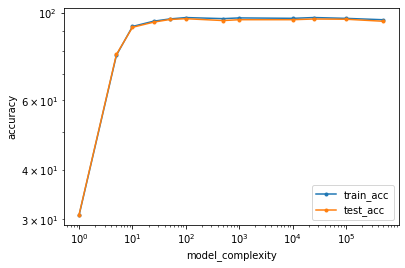

### Setting things up

In [0]:
!pip install torch torchvision

In [0]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np
from tqdm.notebook import tqdm as tqdm
import matplotlib.pyplot as plt

### Code to train MNIST

In [0]:
input_size = 784 # img_size = (28,28) ---> 28*28=784 in total
hidden_size = 500 # number of nodes at hidden layer
num_classes = 10 # number of output classes discrete range [0,9]
num_epochs = 2 # number of times which the entire dataset is passed throughout the model
batch_size = 64  # the size of input data took for one iteration
lr = 1e-2 # size of step

In [0]:
train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
train_gen = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = batch_size,
                                             shuffle = True)

test_gen = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size, 
                                      shuffle = False)

In [0]:
class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)
  
  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

Epoch [1/2], Step [100/937], Loss: 1.9587
Epoch [1/2], Step [200/937], Loss: 1.9158
Epoch [1/2], Step [300/937], Loss: 1.9201
Epoch [1/2], Step [400/937], Loss: 1.7962
Epoch [1/2], Step [500/937], Loss: 1.8130
Epoch [1/2], Step [600/937], Loss: 1.8178
Epoch [1/2], Step [700/937], Loss: 1.8907
Epoch [1/2], Step [800/937], Loss: 1.7403
Epoch [1/2], Step [900/937], Loss: 1.6911
Epoch [2/2], Step [100/937], Loss: 1.8535
Epoch [2/2], Step [200/937], Loss: 1.7431
Epoch [2/2], Step [300/937], Loss: 1.8217
Epoch [2/2], Step [400/937], Loss: 1.7651
Epoch [2/2], Step [500/937], Loss: 1.8067
Epoch [2/2], Step [600/937], Loss: 1.6424
Epoch [2/2], Step [700/937], Loss: 1.7665
Epoch [2/2], Step [800/937], Loss: 1.8132
Epoch [2/2], Step [900/937], Loss: 1.6469


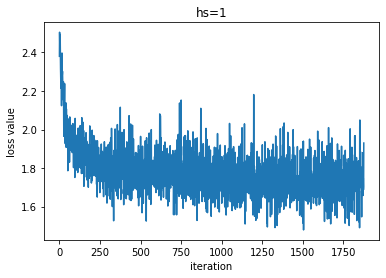

Train accuracy of the model: 30.701 %
tensor(18421, device='cuda:0') 60000
Test accuracy of the model: 30.807 %
tensor(3081, device='cuda:0') 10000
Epoch [1/2], Step [100/937], Loss: 1.2394
Epoch [1/2], Step [200/937], Loss: 1.0439
Epoch [1/2], Step [300/937], Loss: 1.0010
Epoch [1/2], Step [400/937], Loss: 1.3232
Epoch [1/2], Step [500/937], Loss: 0.6895
Epoch [1/2], Step [600/937], Loss: 1.0247
Epoch [1/2], Step [700/937], Loss: 0.8024
Epoch [1/2], Step [800/937], Loss: 0.7297
Epoch [1/2], Step [900/937], Loss: 0.6217
Epoch [2/2], Step [100/937], Loss: 0.5700
Epoch [2/2], Step [200/937], Loss: 0.6317
Epoch [2/2], Step [300/937], Loss: 0.6442
Epoch [2/2], Step [400/937], Loss: 0.4109
Epoch [2/2], Step [500/937], Loss: 0.7590
Epoch [2/2], Step [600/937], Loss: 0.8361
Epoch [2/2], Step [700/937], Loss: 0.8503
Epoch [2/2], Step [800/937], Loss: 0.7333
Epoch [2/2], Step [900/937], Loss: 0.8512


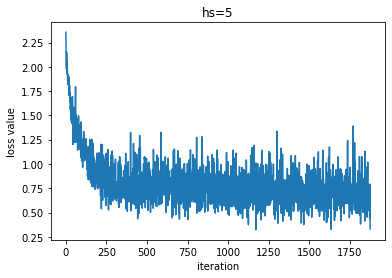

Train accuracy of the model: 77.980 %
tensor(46789, device='cuda:0') 60000
Test accuracy of the model: 78.352 %
tensor(7836, device='cuda:0') 10000
Epoch [1/2], Step [100/937], Loss: 0.3801
Epoch [1/2], Step [200/937], Loss: 0.5519
Epoch [1/2], Step [300/937], Loss: 0.2466
Epoch [1/2], Step [400/937], Loss: 0.5685
Epoch [1/2], Step [500/937], Loss: 0.2868
Epoch [1/2], Step [600/937], Loss: 0.3389
Epoch [1/2], Step [700/937], Loss: 0.1998
Epoch [1/2], Step [800/937], Loss: 0.2883
Epoch [1/2], Step [900/937], Loss: 0.2963
Epoch [2/2], Step [100/937], Loss: 0.1834
Epoch [2/2], Step [200/937], Loss: 0.4048
Epoch [2/2], Step [300/937], Loss: 0.1974
Epoch [2/2], Step [400/937], Loss: 0.2179
Epoch [2/2], Step [500/937], Loss: 0.2956
Epoch [2/2], Step [600/937], Loss: 0.3178
Epoch [2/2], Step [700/937], Loss: 0.3647
Epoch [2/2], Step [800/937], Loss: 0.4229
Epoch [2/2], Step [900/937], Loss: 0.4562


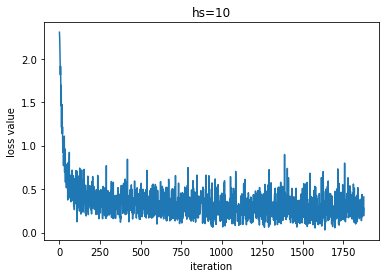

Train accuracy of the model: 92.247 %
tensor(55349, device='cuda:0') 60000
Test accuracy of the model: 91.801 %
tensor(9181, device='cuda:0') 10000
Epoch [1/2], Step [100/937], Loss: 0.1918
Epoch [1/2], Step [200/937], Loss: 0.5054
Epoch [1/2], Step [300/937], Loss: 0.2170
Epoch [1/2], Step [400/937], Loss: 0.2632
Epoch [1/2], Step [500/937], Loss: 0.1365
Epoch [1/2], Step [600/937], Loss: 0.2344
Epoch [1/2], Step [700/937], Loss: 0.0572
Epoch [1/2], Step [800/937], Loss: 0.1493
Epoch [1/2], Step [900/937], Loss: 0.0666
Epoch [2/2], Step [100/937], Loss: 0.1448
Epoch [2/2], Step [200/937], Loss: 0.3855
Epoch [2/2], Step [300/937], Loss: 0.2771
Epoch [2/2], Step [400/937], Loss: 0.0322
Epoch [2/2], Step [500/937], Loss: 0.3117
Epoch [2/2], Step [600/937], Loss: 0.2499
Epoch [2/2], Step [700/937], Loss: 0.2087
Epoch [2/2], Step [800/937], Loss: 0.0559
Epoch [2/2], Step [900/937], Loss: 0.1371


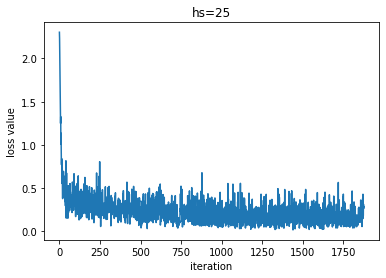

Train accuracy of the model: 95.132 %
tensor(57080, device='cuda:0') 60000
Test accuracy of the model: 94.601 %
tensor(9461, device='cuda:0') 10000
Epoch [1/2], Step [100/937], Loss: 0.2369
Epoch [1/2], Step [200/937], Loss: 0.2238
Epoch [1/2], Step [300/937], Loss: 0.2960
Epoch [1/2], Step [400/937], Loss: 0.2193
Epoch [1/2], Step [500/937], Loss: 0.2569
Epoch [1/2], Step [600/937], Loss: 0.2797
Epoch [1/2], Step [700/937], Loss: 0.2418
Epoch [1/2], Step [800/937], Loss: 0.0881
Epoch [1/2], Step [900/937], Loss: 0.2104
Epoch [2/2], Step [100/937], Loss: 0.1343
Epoch [2/2], Step [200/937], Loss: 0.2787
Epoch [2/2], Step [300/937], Loss: 0.0657
Epoch [2/2], Step [400/937], Loss: 0.1164
Epoch [2/2], Step [500/937], Loss: 0.0786
Epoch [2/2], Step [600/937], Loss: 0.1445
Epoch [2/2], Step [700/937], Loss: 0.0981
Epoch [2/2], Step [800/937], Loss: 0.0855
Epoch [2/2], Step [900/937], Loss: 0.0953


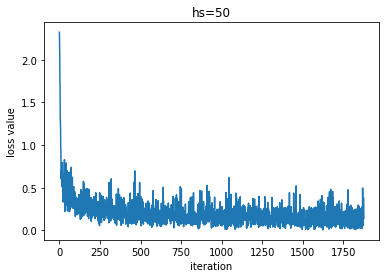

Train accuracy of the model: 96.380 %
tensor(57829, device='cuda:0') 60000
Test accuracy of the model: 96.070 %
tensor(9608, device='cuda:0') 10000
Epoch [1/2], Step [100/937], Loss: 0.2797
Epoch [1/2], Step [200/937], Loss: 0.3101
Epoch [1/2], Step [300/937], Loss: 0.1411
Epoch [1/2], Step [400/937], Loss: 0.2324
Epoch [1/2], Step [500/937], Loss: 0.0884
Epoch [1/2], Step [600/937], Loss: 0.3642
Epoch [1/2], Step [700/937], Loss: 0.0806
Epoch [1/2], Step [800/937], Loss: 0.0613
Epoch [1/2], Step [900/937], Loss: 0.1467
Epoch [2/2], Step [100/937], Loss: 0.1711
Epoch [2/2], Step [200/937], Loss: 0.1488
Epoch [2/2], Step [300/937], Loss: 0.0878
Epoch [2/2], Step [400/937], Loss: 0.1030
Epoch [2/2], Step [500/937], Loss: 0.1505
Epoch [2/2], Step [600/937], Loss: 0.1416
Epoch [2/2], Step [700/937], Loss: 0.2008
Epoch [2/2], Step [800/937], Loss: 0.0664
Epoch [2/2], Step [900/937], Loss: 0.0955


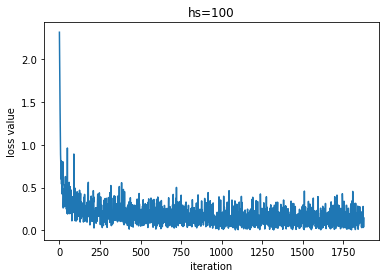

Train accuracy of the model: 97.155 %
tensor(58294, device='cuda:0') 60000
Test accuracy of the model: 96.510 %
tensor(9652, device='cuda:0') 10000
Epoch [1/2], Step [100/937], Loss: 0.4259
Epoch [1/2], Step [200/937], Loss: 0.3272
Epoch [1/2], Step [300/937], Loss: 0.2163
Epoch [1/2], Step [400/937], Loss: 0.3560
Epoch [1/2], Step [500/937], Loss: 0.2775
Epoch [1/2], Step [600/937], Loss: 0.3289
Epoch [1/2], Step [700/937], Loss: 0.0432
Epoch [1/2], Step [800/937], Loss: 0.1363
Epoch [1/2], Step [900/937], Loss: 0.1510
Epoch [2/2], Step [100/937], Loss: 0.1021
Epoch [2/2], Step [200/937], Loss: 0.1147
Epoch [2/2], Step [300/937], Loss: 0.1348
Epoch [2/2], Step [400/937], Loss: 0.2400
Epoch [2/2], Step [500/937], Loss: 0.0645
Epoch [2/2], Step [600/937], Loss: 0.0689
Epoch [2/2], Step [700/937], Loss: 0.0254
Epoch [2/2], Step [800/937], Loss: 0.0665
Epoch [2/2], Step [900/937], Loss: 0.3124


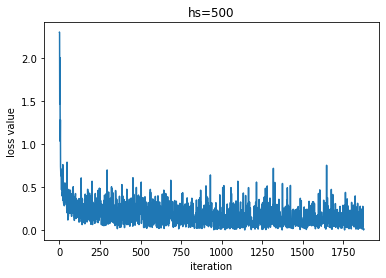

Train accuracy of the model: 96.553 %
tensor(57933, device='cuda:0') 60000
Test accuracy of the model: 95.470 %
tensor(9548, device='cuda:0') 10000
Epoch [1/2], Step [100/937], Loss: 0.2296
Epoch [1/2], Step [200/937], Loss: 0.1164
Epoch [1/2], Step [300/937], Loss: 0.3090
Epoch [1/2], Step [400/937], Loss: 0.0759
Epoch [1/2], Step [500/937], Loss: 0.1006
Epoch [1/2], Step [600/937], Loss: 0.1828
Epoch [1/2], Step [700/937], Loss: 0.1891
Epoch [1/2], Step [800/937], Loss: 0.5177
Epoch [1/2], Step [900/937], Loss: 0.0975
Epoch [2/2], Step [100/937], Loss: 0.1714
Epoch [2/2], Step [200/937], Loss: 0.0571
Epoch [2/2], Step [300/937], Loss: 0.1869
Epoch [2/2], Step [400/937], Loss: 0.0093
Epoch [2/2], Step [500/937], Loss: 0.0551
Epoch [2/2], Step [600/937], Loss: 0.0075
Epoch [2/2], Step [700/937], Loss: 0.1048
Epoch [2/2], Step [800/937], Loss: 0.2874
Epoch [2/2], Step [900/937], Loss: 0.0318


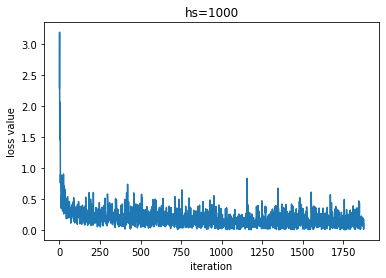

Train accuracy of the model: 96.958 %
tensor(58176, device='cuda:0') 60000
Test accuracy of the model: 95.950 %
tensor(9596, device='cuda:0') 10000
Epoch [1/2], Step [100/937], Loss: 0.3408
Epoch [1/2], Step [200/937], Loss: 0.2195
Epoch [1/2], Step [300/937], Loss: 0.1958
Epoch [1/2], Step [400/937], Loss: 0.4694
Epoch [1/2], Step [500/937], Loss: 0.4070
Epoch [1/2], Step [600/937], Loss: 0.1753
Epoch [1/2], Step [700/937], Loss: 0.0707
Epoch [1/2], Step [800/937], Loss: 0.3263
Epoch [1/2], Step [900/937], Loss: 0.1791
Epoch [2/2], Step [100/937], Loss: 0.1406
Epoch [2/2], Step [200/937], Loss: 0.0649
Epoch [2/2], Step [300/937], Loss: 0.3510
Epoch [2/2], Step [400/937], Loss: 0.0171
Epoch [2/2], Step [500/937], Loss: 0.0807
Epoch [2/2], Step [600/937], Loss: 0.1817
Epoch [2/2], Step [700/937], Loss: 0.1191
Epoch [2/2], Step [800/937], Loss: 0.0989
Epoch [2/2], Step [900/937], Loss: 0.0938


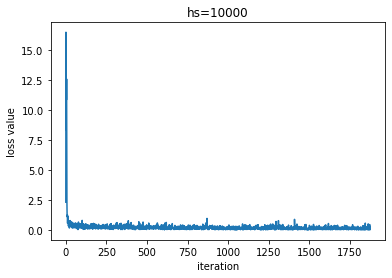

Train accuracy of the model: 96.728 %
tensor(58038, device='cuda:0') 60000
Test accuracy of the model: 95.950 %
tensor(9596, device='cuda:0') 10000
Epoch [1/2], Step [100/937], Loss: 0.7591
Epoch [1/2], Step [200/937], Loss: 0.1476
Epoch [1/2], Step [300/937], Loss: 0.5568
Epoch [1/2], Step [400/937], Loss: 0.0930
Epoch [1/2], Step [500/937], Loss: 0.4661
Epoch [1/2], Step [600/937], Loss: 0.3052
Epoch [1/2], Step [700/937], Loss: 0.0633
Epoch [1/2], Step [800/937], Loss: 0.1610
Epoch [1/2], Step [900/937], Loss: 0.2161
Epoch [2/2], Step [100/937], Loss: 0.2573
Epoch [2/2], Step [200/937], Loss: 0.3103
Epoch [2/2], Step [300/937], Loss: 0.1950
Epoch [2/2], Step [400/937], Loss: 0.3529
Epoch [2/2], Step [500/937], Loss: 0.4489
Epoch [2/2], Step [600/937], Loss: 0.3028
Epoch [2/2], Step [700/937], Loss: 0.0840
Epoch [2/2], Step [800/937], Loss: 0.1741
Epoch [2/2], Step [900/937], Loss: 0.0018


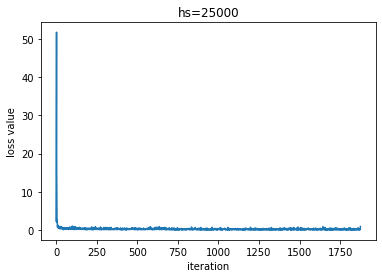

Train accuracy of the model: 97.170 %
tensor(58303, device='cuda:0') 60000
Test accuracy of the model: 96.340 %
tensor(9635, device='cuda:0') 10000
Epoch [1/2], Step [100/937], Loss: 0.7780
Epoch [1/2], Step [200/937], Loss: 0.5279
Epoch [1/2], Step [300/937], Loss: 0.2777
Epoch [1/2], Step [400/937], Loss: 0.1196
Epoch [1/2], Step [500/937], Loss: 0.2714
Epoch [1/2], Step [600/937], Loss: 0.5489
Epoch [1/2], Step [700/937], Loss: 0.0761
Epoch [1/2], Step [800/937], Loss: 0.2207
Epoch [1/2], Step [900/937], Loss: 0.1241
Epoch [2/2], Step [100/937], Loss: 0.4388
Epoch [2/2], Step [200/937], Loss: 0.6863
Epoch [2/2], Step [300/937], Loss: 0.3034
Epoch [2/2], Step [400/937], Loss: 0.4960
Epoch [2/2], Step [500/937], Loss: 0.0602
Epoch [2/2], Step [600/937], Loss: 0.3061
Epoch [2/2], Step [700/937], Loss: 0.1606
Epoch [2/2], Step [800/937], Loss: 0.1321
Epoch [2/2], Step [900/937], Loss: 0.1364


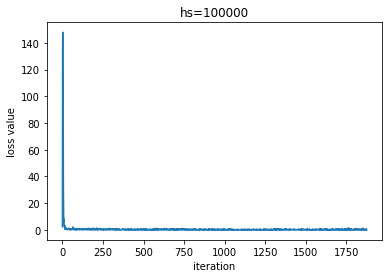

Train accuracy of the model: 96.705 %
tensor(58024, device='cuda:0') 60000
Test accuracy of the model: 96.210 %
tensor(9622, device='cuda:0') 10000
Epoch [1/2], Step [100/937], Loss: 1.5788
Epoch [1/2], Step [200/937], Loss: 0.9267
Epoch [1/2], Step [300/937], Loss: 1.0123
Epoch [1/2], Step [400/937], Loss: 0.2372
Epoch [1/2], Step [500/937], Loss: 1.3963
Epoch [1/2], Step [600/937], Loss: 0.3956
Epoch [1/2], Step [700/937], Loss: 0.3549
Epoch [1/2], Step [800/937], Loss: 0.2948
Epoch [1/2], Step [900/937], Loss: 3.1270
Epoch [2/2], Step [100/937], Loss: 0.0544
Epoch [2/2], Step [200/937], Loss: 0.9209
Epoch [2/2], Step [300/937], Loss: 0.7596
Epoch [2/2], Step [400/937], Loss: 0.8714
Epoch [2/2], Step [500/937], Loss: 0.0834
Epoch [2/2], Step [600/937], Loss: 0.5919
Epoch [2/2], Step [700/937], Loss: 0.3369
Epoch [2/2], Step [800/937], Loss: 0.4770
Epoch [2/2], Step [900/937], Loss: 0.1169


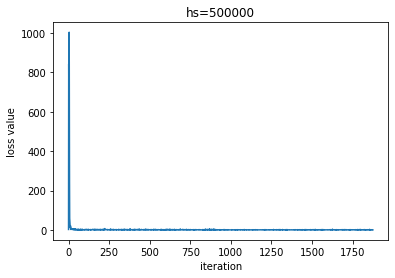

Train accuracy of the model: 95.923 %
tensor(57555, device='cuda:0') 60000
Test accuracy of the model: 95.070 %
tensor(9508, device='cuda:0') 10000


In [0]:
SIZES = [1, 5, 10, 25, 50, 100, 500, 1000, 10000, 25000, 100000, 500000]
storage = []
for i, hidden_size in enumerate(SIZES):
  net = Net(input_size, hidden_size, num_classes)
  if torch.cuda.is_available():
    net.cuda()
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam( net.parameters(), lr=lr)

  # Training 
  loss_vec = []
  for epoch in range(num_epochs):
    for i ,(images,labels) in enumerate(train_gen):
      images = images.view(-1,28*28)
      labels = labels

      if(torch.cuda.is_available()):
        images = images.cuda()
        labels = labels.cuda()
      
      optimizer.zero_grad()
      outputs = net(images)
      loss = loss_function(outputs, labels)
      loss.backward()
      optimizer.step()
      loss_vec.append(loss.data.tolist())
      if (i+1) % 100 == 0:
        print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                  %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.item()))

  plt.plot(loss_vec), plt.xlabel('iteration'), plt.ylabel('loss value')
  plt.title('hs='+str(hidden_size))
  plt.show()

  # Estimate train accuracy      
  correct = 0
  total = 0

  for images,labels in train_gen:
    images = images.view(-1,28*28)
    labels = labels
    if(torch.cuda.is_available()):
        images = images.cuda()
        labels = labels.cuda()
    
    output = net(images)
    _, predicted = torch.max(output,1)
    correct += (predicted == labels).sum()
    total += labels.size(0)
  train_acc = (100*correct.cpu().numpy())/(total+1)
  print('Train accuracy of the model: %.3f %%' %(train_acc))
  print(correct, total)

  # Estimate test accuracy
  correct = 0
  total = 0
  for images,labels in test_gen:
    images = images.view(-1,28*28)
    labels = labels
    if(torch.cuda.is_available()):
        images = images.cuda()
        labels = labels.cuda()
    
    output = net(images)
    _, predicted = torch.max(output,1)
    correct += (predicted == labels).sum()
    total += labels.size(0)
  test_acc = (100*correct.cpu().numpy())/(total+1)
  print('Test accuracy of the model: %.3f %%' %(test_acc))
  print(correct, total)

  storage.append([hidden_size, train_acc, test_acc])

2.3146495819091797

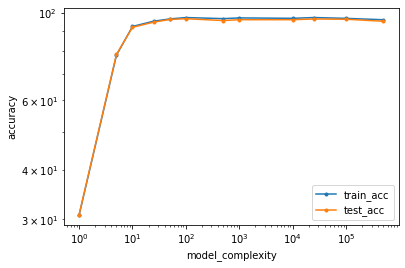

In [0]:
storage_np = np.array(storage)
plt.loglog(storage_np[:,0], storage_np[:,1], '.-', label='train_acc')
plt.loglog(storage_np[:,0], storage_np[:,2], '.-', label='test_acc')
plt.xlabel('model_complexity')
plt.ylabel('accuracy')
plt.legend()
plt.show()